In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [2]:
df = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/training.csv')

#after uploading training and test sets, we apply some transformations: 
#date divided into date and time
#delete HumidityRatio
#remove Light outliers

df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df['Time']= df['date'].apply(lambda x:x.time())
df['Date']= df['date'].apply(lambda x:x.date())
df['Time'] =  pd.to_timedelta(str(x) for x in df['Time'])
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.drop('date', axis=1, inplace=True)
df.drop('Unnamed: 0',  axis=1,inplace=True)
df.drop('HumidityRatio', axis=1,inplace=True)
df=df[df['Light']<1000] 

In [3]:
test=pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/test.csv')

test['date'] =  pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
test['Time']= test['date'].apply(lambda x:x.time())
test['Date']= test['date'].apply(lambda x:x.date())
test['Time'] =  pd.to_timedelta(str(x) for x in test['Time'])
test['Date'] =  pd.to_datetime(test['Date'], format='%Y-%m-%d')
test.drop('date', axis=1, inplace=True)
test.drop('Unnamed: 0',  axis=1,inplace=True)
test.drop('HumidityRatio',inplace=True,axis=1)

In [4]:
df['Holidays'] = df['Date'].apply(lambda x: 0 if x.weekday()<5 else 1 )
test['Holidays'] = test['Date'].apply(lambda x: 0 if x.weekday()<5 else 1 )
y_name = 'Occupancy'

# Data Partitioning

In [5]:
attributes = ['Temperature','CO2','Light','Humidity','Holidays'] 

#X =df[attributes].values
#y=df['Occupancy'].values
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)
    
X_train =df[attributes].values
y_train=df['Occupancy'].values
X_test=test[attributes].values
y_test=test['Occupancy'].values

feature_names = attributes

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [7]:
X_train.shape

(14384, 5)

In [8]:
np.sqrt(71)

8.426149773176359

# Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9940012970168612
F1-score [0.99609416 0.98707649]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4747
           1       0.98      0.99      0.99      1421

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [11]:
classification_report(y_test, y_pred, output_dict=True)

{'0': {'precision': 0.9983072365636902,
  'recall': 0.993890878449547,
  'f1-score': 0.9960941623561702,
  'support': 4747},
 '1': {'precision': 0.9798890429958391,
  'recall': 0.9943701618578465,
  'f1-score': 0.9870764931889626,
  'support': 1421},
 'accuracy': 0.9940012970168612,
 'macro avg': {'precision': 0.9890981397797647,
  'recall': 0.9941305201536967,
  'f1-score': 0.9915853277725664,
  'support': 6168},
 'weighted avg': {'precision': 0.9940640048743393,
  'recall': 0.9940012970168612,
  'f1-score': 0.9940166481073696,
  'support': 6168}}

In [12]:
import json
json.dumps(classification_report(y_test, y_pred, output_dict=True))

'{"0": {"precision": 0.9983072365636902, "recall": 0.993890878449547, "f1-score": 0.9960941623561702, "support": 4747}, "1": {"precision": 0.9798890429958391, "recall": 0.9943701618578465, "f1-score": 0.9870764931889626, "support": 1421}, "accuracy": 0.9940012970168612, "macro avg": {"precision": 0.9890981397797647, "recall": 0.9941305201536967, "f1-score": 0.9915853277725664, "support": 6168}, "weighted avg": {"precision": 0.9940640048743393, "recall": 0.9940012970168612, "f1-score": 0.9940166481073696, "support": 6168}}'

In [13]:
json.loads(json.dumps(classification_report(y_test, y_pred, output_dict=True)))

{'0': {'precision': 0.9983072365636902,
  'recall': 0.993890878449547,
  'f1-score': 0.9960941623561702,
  'support': 4747},
 '1': {'precision': 0.9798890429958391,
  'recall': 0.9943701618578465,
  'f1-score': 0.9870764931889626,
  'support': 1421},
 'accuracy': 0.9940012970168612,
 'macro avg': {'precision': 0.9890981397797647,
  'recall': 0.9941305201536967,
  'f1-score': 0.9915853277725664,
  'support': 6168},
 'weighted avg': {'precision': 0.9940640048743393,
  'recall': 0.9940012970168612,
  'f1-score': 0.9940166481073696,
  'support': 6168}}

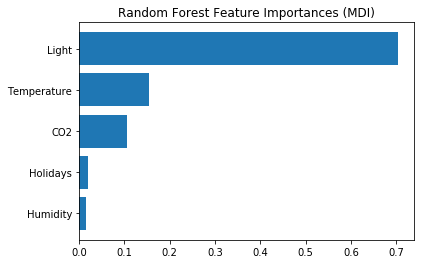

In [14]:
nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(feature_names)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [15]:
from sklearn.inspection import permutation_importance

In [16]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

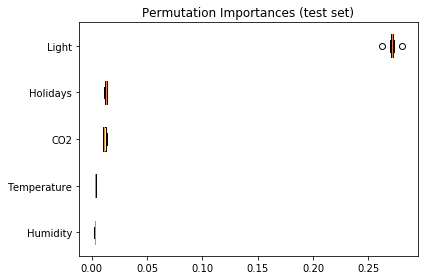

In [17]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [18]:
import pydotplus
from sklearn import tree
from IPython.display import Image

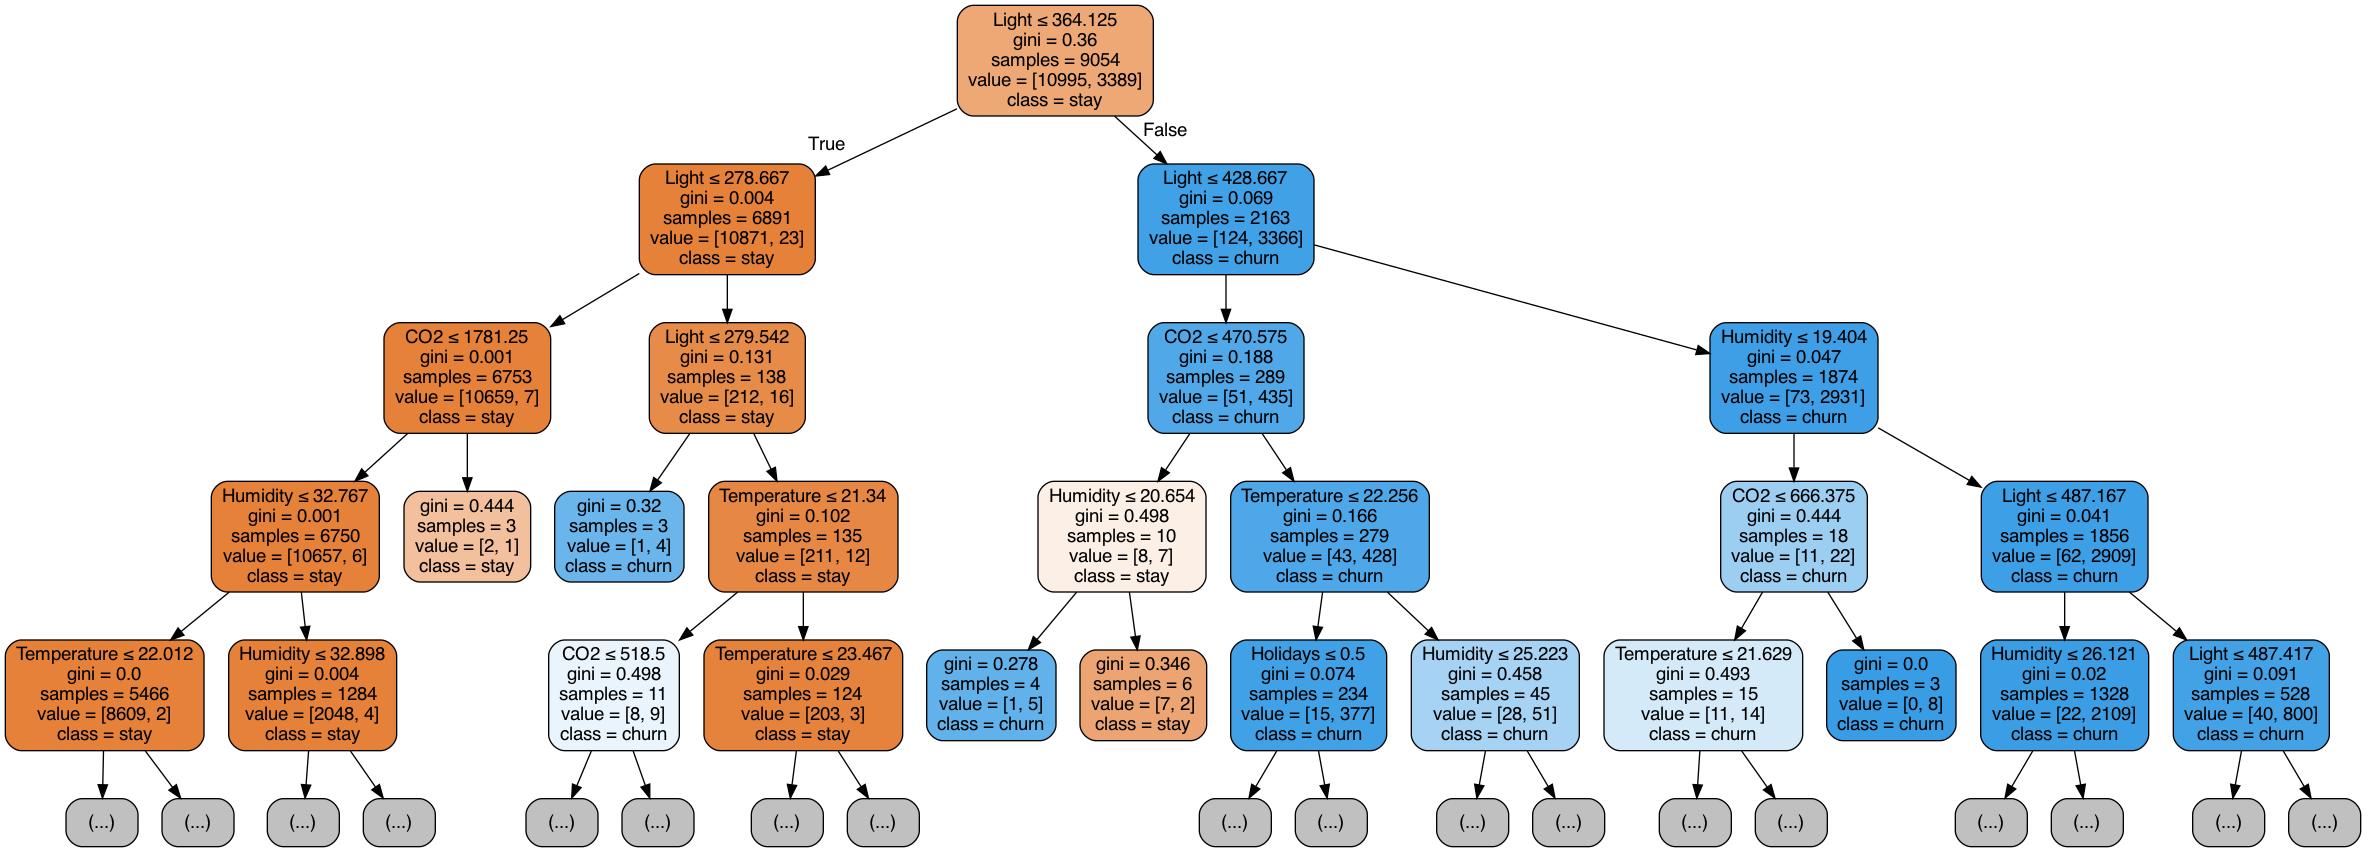

In [19]:
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,  
                                feature_names=feature_names, 
                                class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

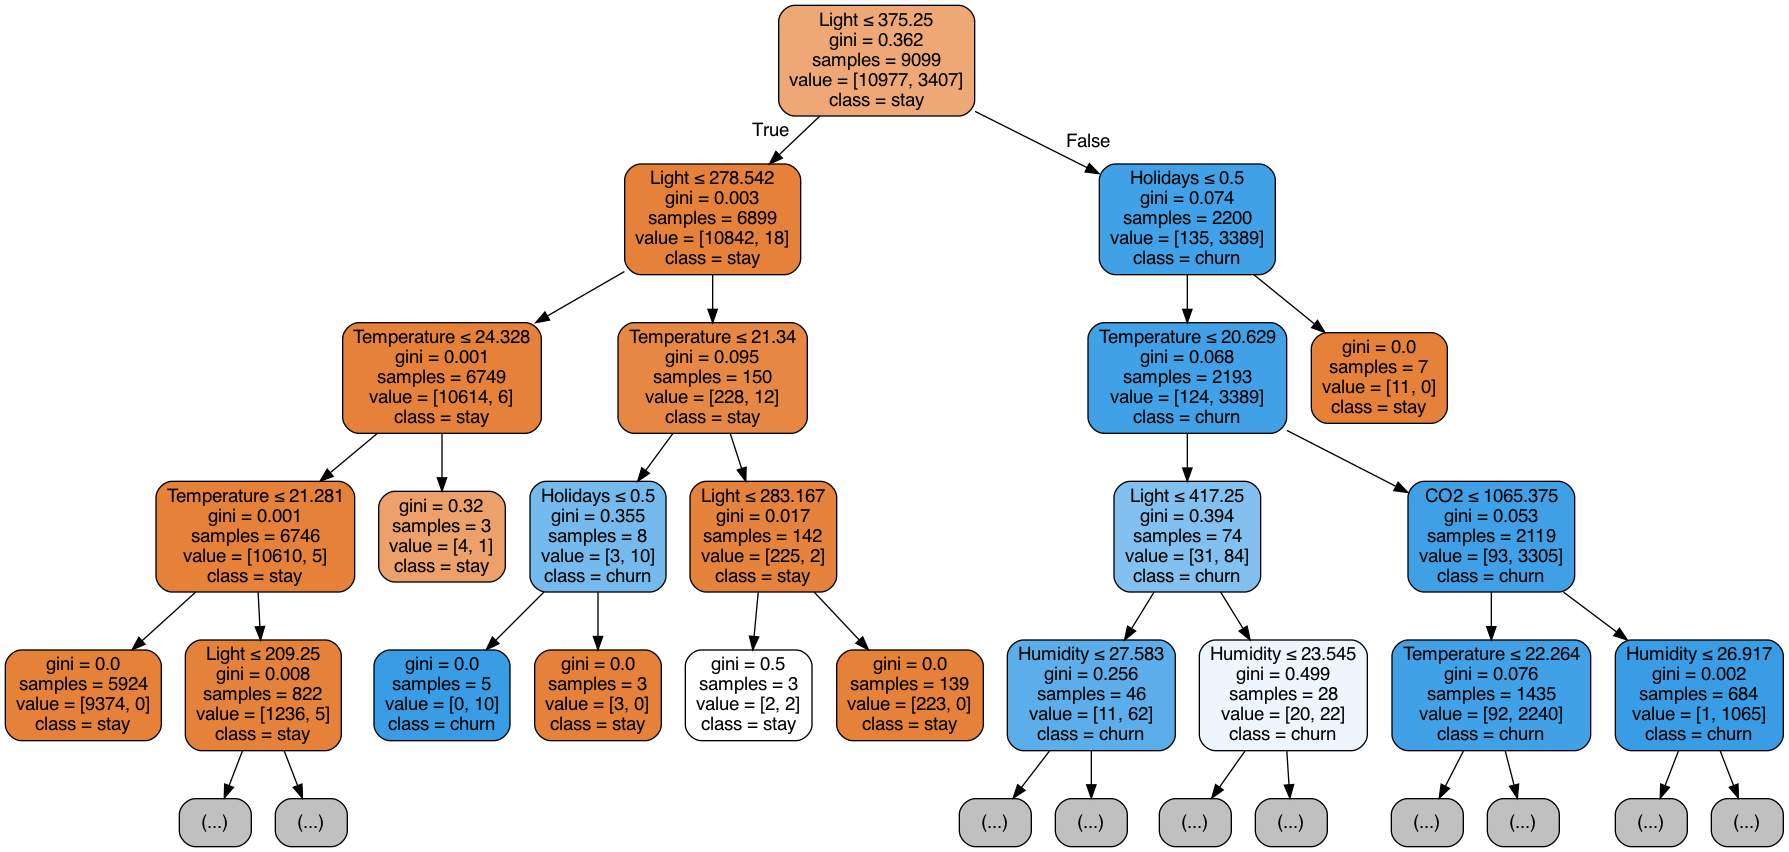

In [20]:
dot_data = tree.export_graphviz(clf.estimators_[1], out_file=None,  
                                feature_names=feature_names, 
                                class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [21]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=4, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.996757457846952
F1-score [0.99789119 0.99298738]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4747
           1       0.99      1.00      0.99      1421

    accuracy                           1.00      6168
   macro avg       0.99      1.00      1.00      6168
weighted avg       1.00      1.00      1.00      6168



In [22]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9970817120622568
F1-score [0.99810207 0.99368864]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4747
           1       0.99      1.00      0.99      1421

    accuracy                           1.00      6168
   macro avg       0.99      1.00      1.00      6168
weighted avg       1.00      1.00      1.00      6168



In [23]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=4, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9909208819714657
F1-score [0.99407533 0.98058252]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4747
           1       0.97      1.00      0.98      1421

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



### Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score

In [26]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5)

print('Accuracy %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Accuracy 0.993 +/- 0.001


### Tuning the hyper-parameters

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [31]:
param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1,3,5,7,9],
             }

grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)
grid_search.fit(X_train, y_train)
random_search = RandomizedSearchCV(clf, param_distributions=param_list, cv=5)
random_search.fit(X_train, y_train)

clf = grid_search.best_estimator_

y_pred = clf.predict(X_test)


print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9969195849546044
F1-score [0.99799641 0.99334034]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4747
           1       0.99      1.00      0.99      1421

    accuracy                           1.00      6168
   macro avg       0.99      1.00      1.00      6168
weighted avg       1.00      1.00      1.00      6168



In [32]:
grid_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]]

{'min_samples_leaf': 3, 'min_samples_split': 2}

In [33]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=20, cv=5)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9969195849546044
F1-score [0.99799641 0.99334034]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4747
           1       0.99      1.00      0.99      1421

    accuracy                           1.00      6168
   macro avg       0.99      1.00      1.00      6168
weighted avg       1.00      1.00      1.00      6168



In [34]:
random_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]]

{'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 13}

# Bagging

In [35]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

If None, then the base estimator is a decision tree.

In [36]:
clf = BaggingClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.996757457846952
F1-score [0.99789119 0.99298738]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4747
           1       0.99      1.00      0.99      1421

    accuracy                           1.00      6168
   macro avg       0.99      1.00      1.00      6168
weighted avg       1.00      1.00      1.00      6168



In [37]:
clf = BaggingClassifier(base_estimator=SVC(C=1000), n_estimators=10, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9902723735408561
F1-score [0.99364676 0.97925311]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4747
           1       0.96      1.00      0.98      1421

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [38]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9944876783398184
F1-score [0.99641123 0.9881202 ]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4747
           1       0.98      1.00      0.99      1421

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



# Boosting

In [39]:
from sklearn.ensemble import AdaBoostClassifier

If None, then the base estimator is DecisionTreeClassifier(max_depth=1).

In [40]:
clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9910830090791181
F1-score [0.99418174 0.98092265]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4747
           1       0.97      1.00      0.98      1421

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [41]:
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9969195849546044
F1-score [0.99799641 0.99334034]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4747
           1       0.99      1.00      0.99      1421

    accuracy                           1.00      6168
   macro avg       0.99      1.00      1.00      6168
weighted avg       1.00      1.00      1.00      6168



In [42]:
X = df[['Light','Temperature']].values
y = df['Occupancy'].values

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_train_pca
X=X_train_pca

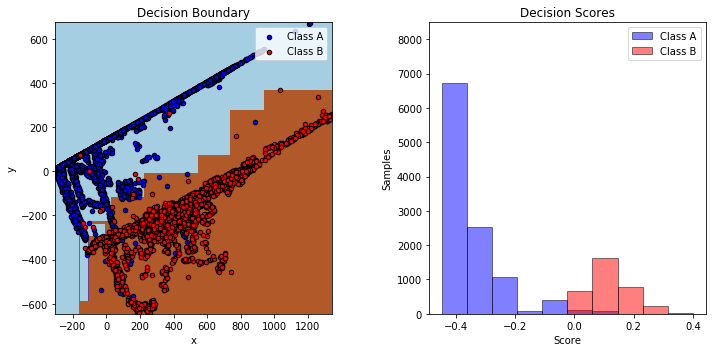

In [44]:
# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles



# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 1
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min()-1 , X[:, 0].max()+1 
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step/100))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

In [45]:
X

array([[-149.91025802,   77.74954175],
       [-207.60985968,   52.61871369],
       [-177.67729444,   65.62922608],
       ...,
       [-261.71309891,   28.95813314],
       [ 220.13092934, -233.18786039],
       [-227.32455125,   43.9947393 ]])

# Stacking

In [46]:
from sklearn.ensemble import StackingClassifier

In [47]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [('rf',RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)),
                             ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9936770428015564
F1-score [0.99588217 0.98638743]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4747
           1       0.98      0.99      0.99      1421

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [48]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier

estimators = [('rf',RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)),
                             ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
clf = StackingClassifier( estimators=estimators, final_estimator=MLPClassifier(random_state=0,solver= 'adam', learning_rate_init= 0.01, hidden_layer_sizes=(15)))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9948119325551232
F1-score [0.99662233 0.98881901]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4747
           1       0.98      1.00      0.99      1421

    accuracy                           0.99      6168
   macro avg       0.99      1.00      0.99      6168
weighted avg       0.99      0.99      0.99      6168

